# **1. 패키지 설정**

In [ ]:
# Install pip packages in the current Jupyter kernel

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우를 제거
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import matplotlib.pyplot as plt
import platform

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid')
    rc('font', family = 'AppleGothic')

elif platform.system() == 'Windows':# 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# **2. EDA 수행**

In [ ]:
df = pd.read_csv('/content/sample_data/Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# 데이터 shape 파악
df.shape
# 데이터 통계량 파악
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df.isnull().sum().to_frame('nan_count')


,nan_count
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [ ]:
df.types()

AttributeError: 'DataFrame' object has no attribute 'types'

In [ ]:
duplicates = df.duplicated(subset=['customer_id'])
if duplicates.any():
    print("customer_id에 중복된 값이 있습니다.")
    print(df[duplicates])
else:
    print("customer_id에 중복된 값이 없습니다.")

customer_id에 중복된 값이 없습니다.


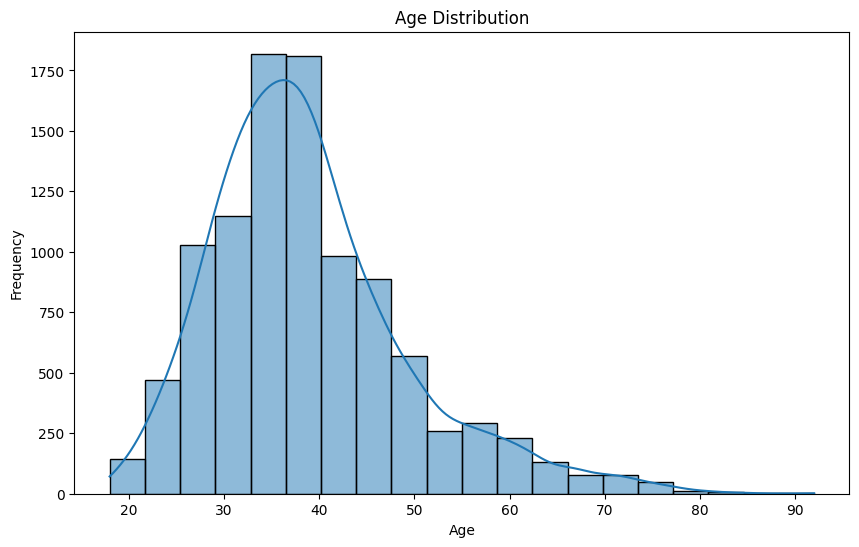

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

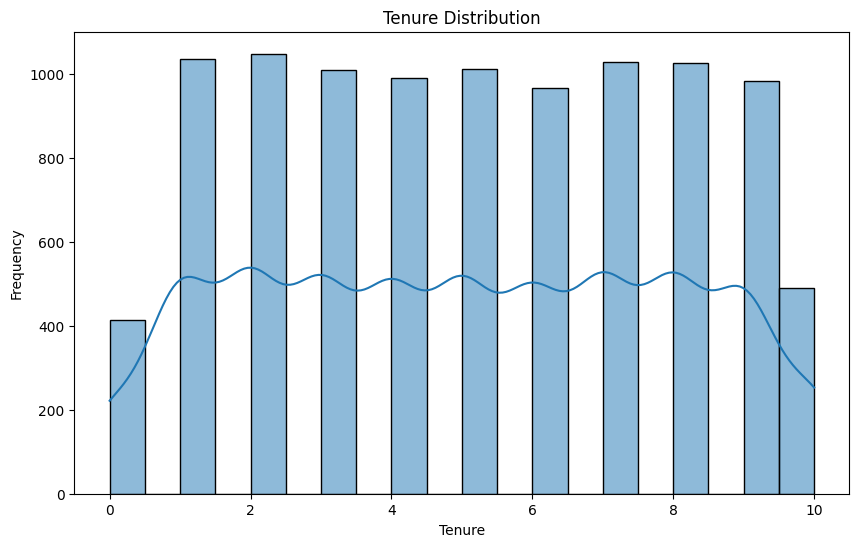

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', bins=20, kde=True)
plt.title('Tenure Distribution')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

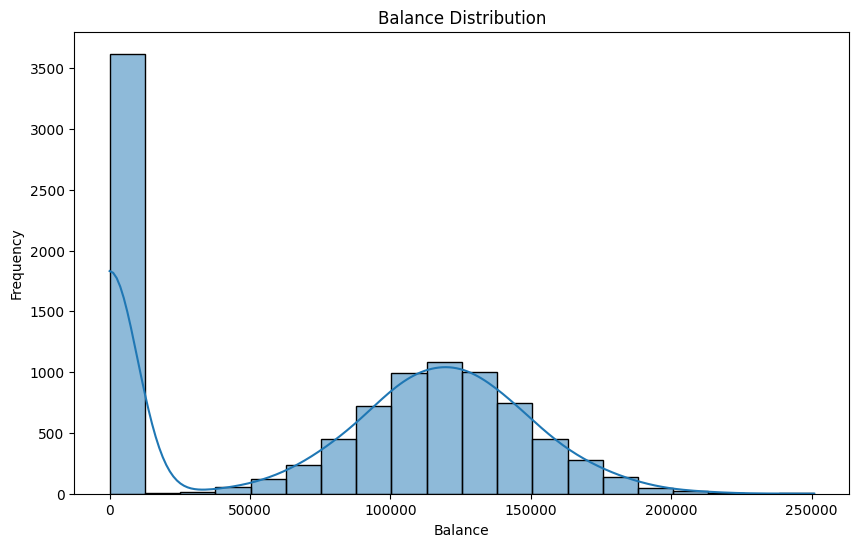

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='balance', bins=20, kde=True)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

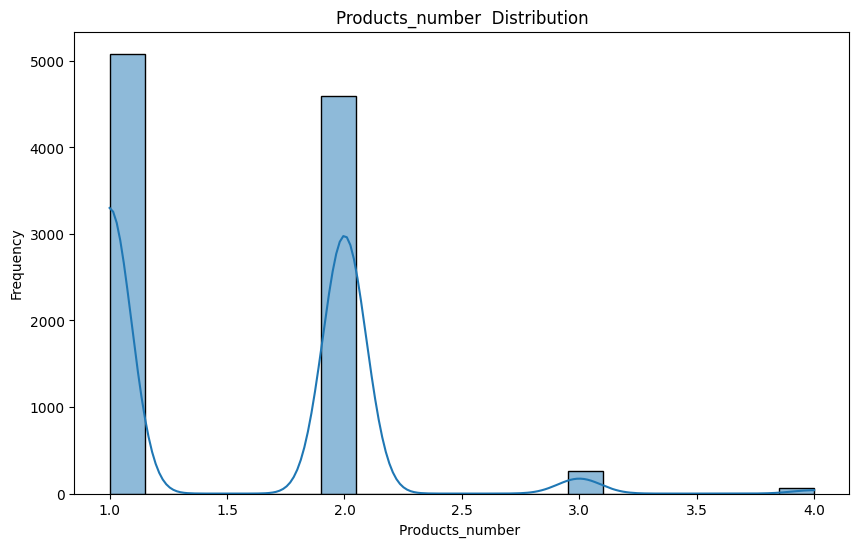

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='products_number', bins=20, kde=True)
plt.title('Products_number  Distribution')
plt.xlabel('Products_number ')
plt.ylabel('Frequency')
plt.show()

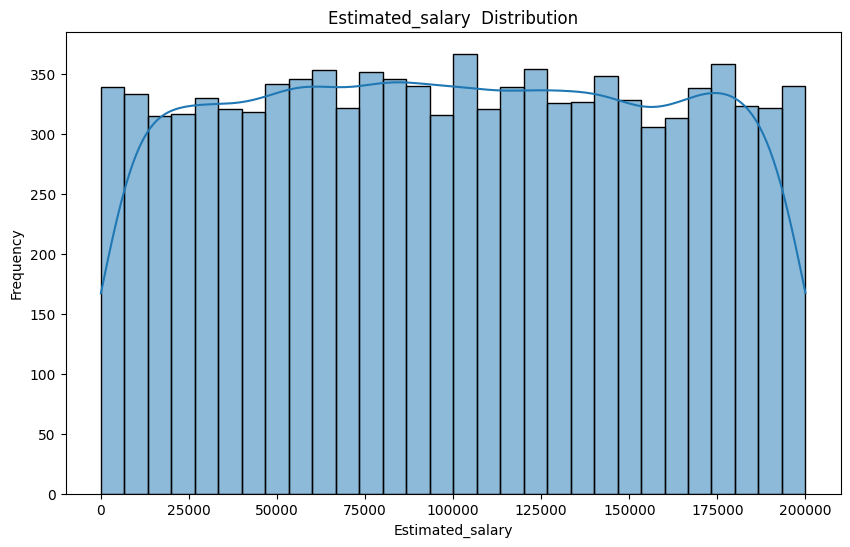

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='estimated_salary', bins=30, kde=True)
plt.title('Estimated_salary  Distribution')
plt.xlabel('Estimated_salary')
plt.ylabel('Frequency')
plt.show()

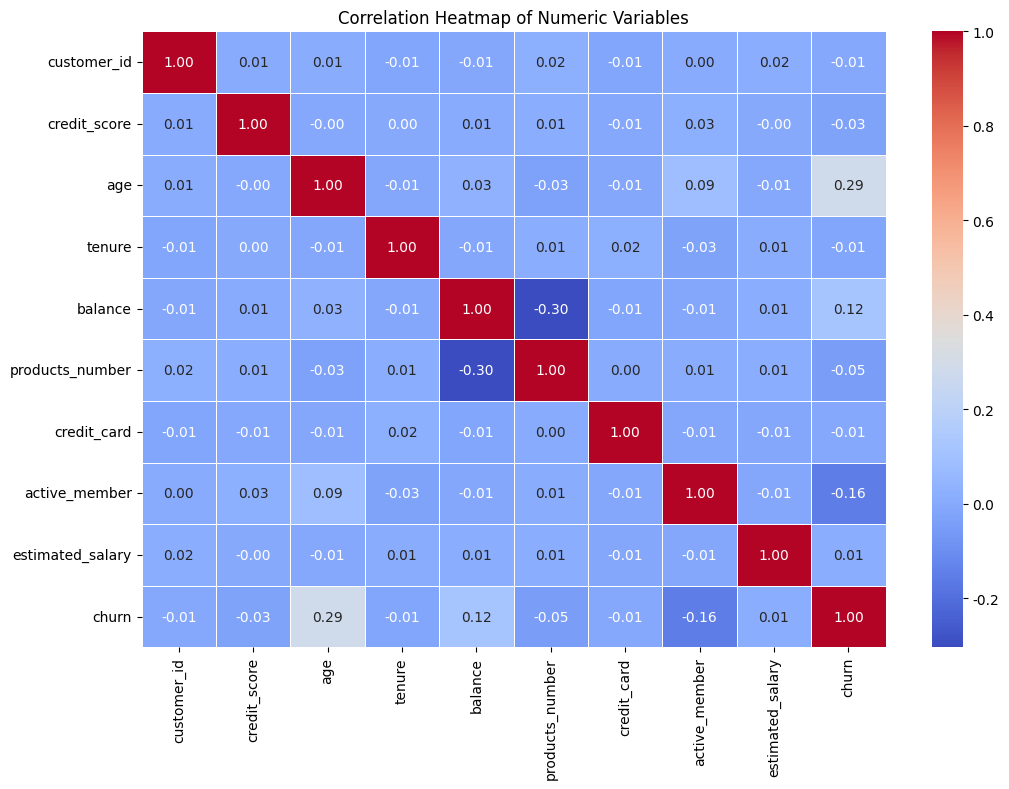

In [ ]:
# 수치형 데이터만 선택
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# 상관계수 계산
correlation_matrix = numeric_df.corr()

# 상관계수 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


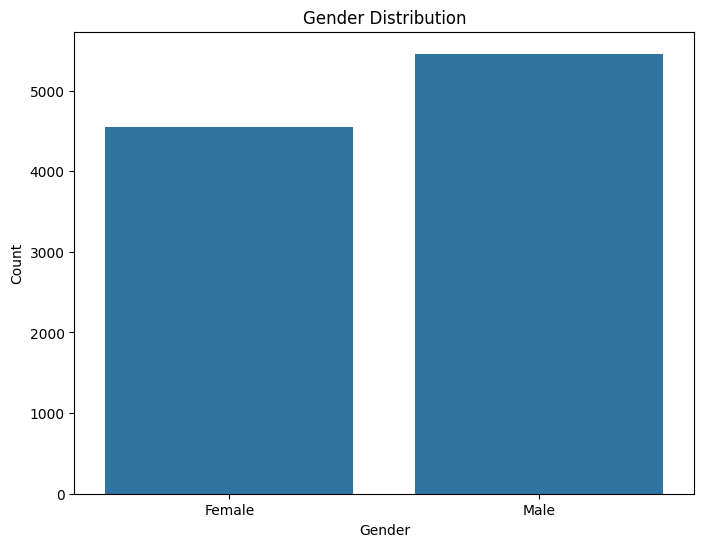

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

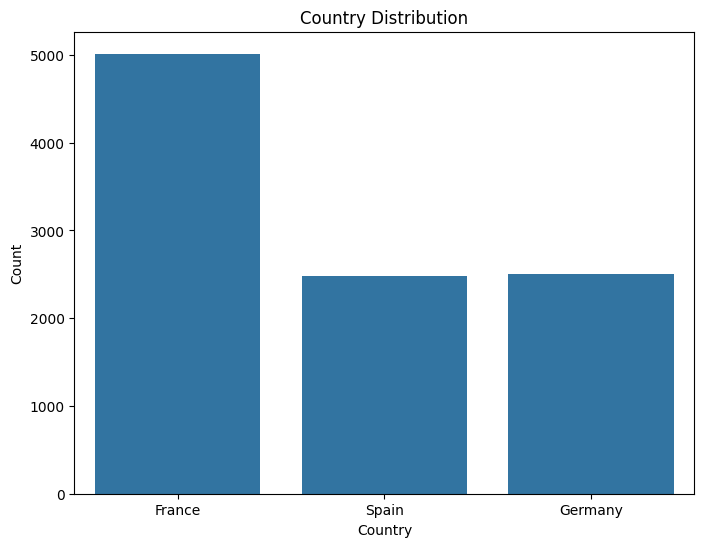

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='country')
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

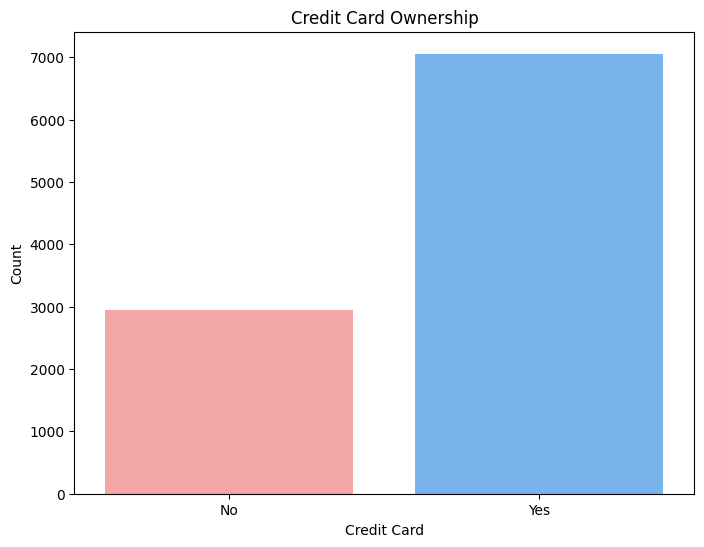

In [ ]:
# credit_card 분포 카운트 플롯 그리기
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='credit_card', palette=['#ff9999', '#66b3ff'])
plt.title('Credit Card Ownership')
plt.xlabel('Credit Card')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # x축 레이블 설정
plt.show()


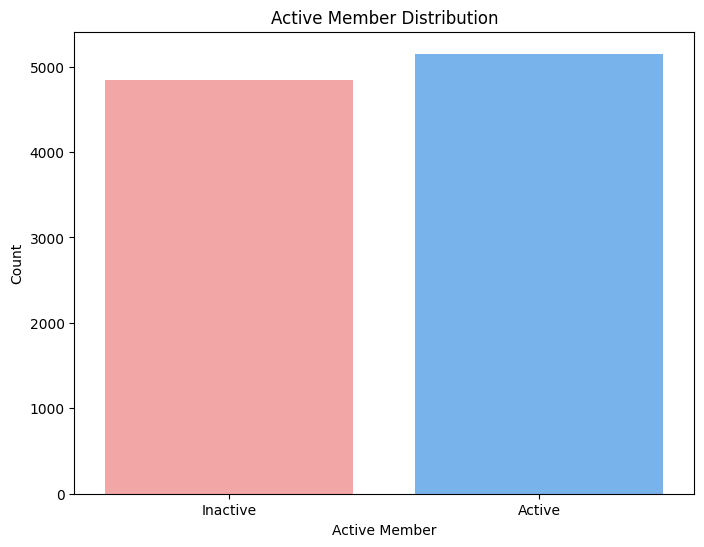

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='active_member', palette=['#ff9999', '#66b3ff'])
plt.title('Active Member Distribution')
plt.xlabel('Active Member')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active'])  # x축 레이블 설정
plt.show()

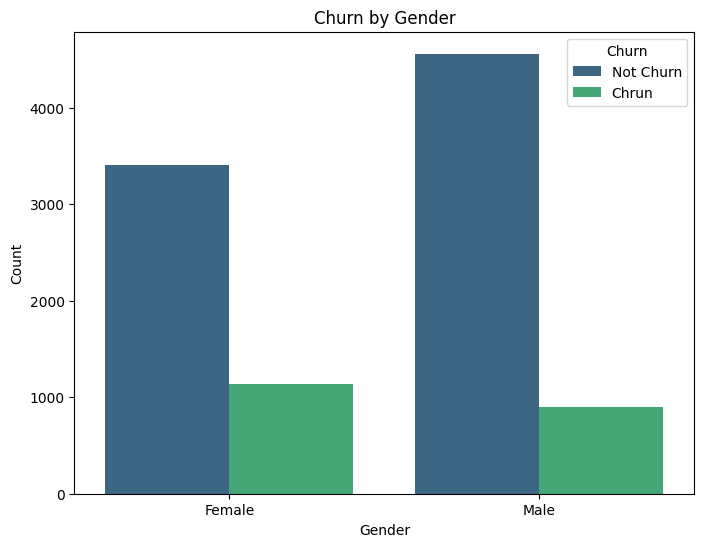

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='gender', hue='churn', palette='viridis')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churn', 'Chrun'])
plt.show()

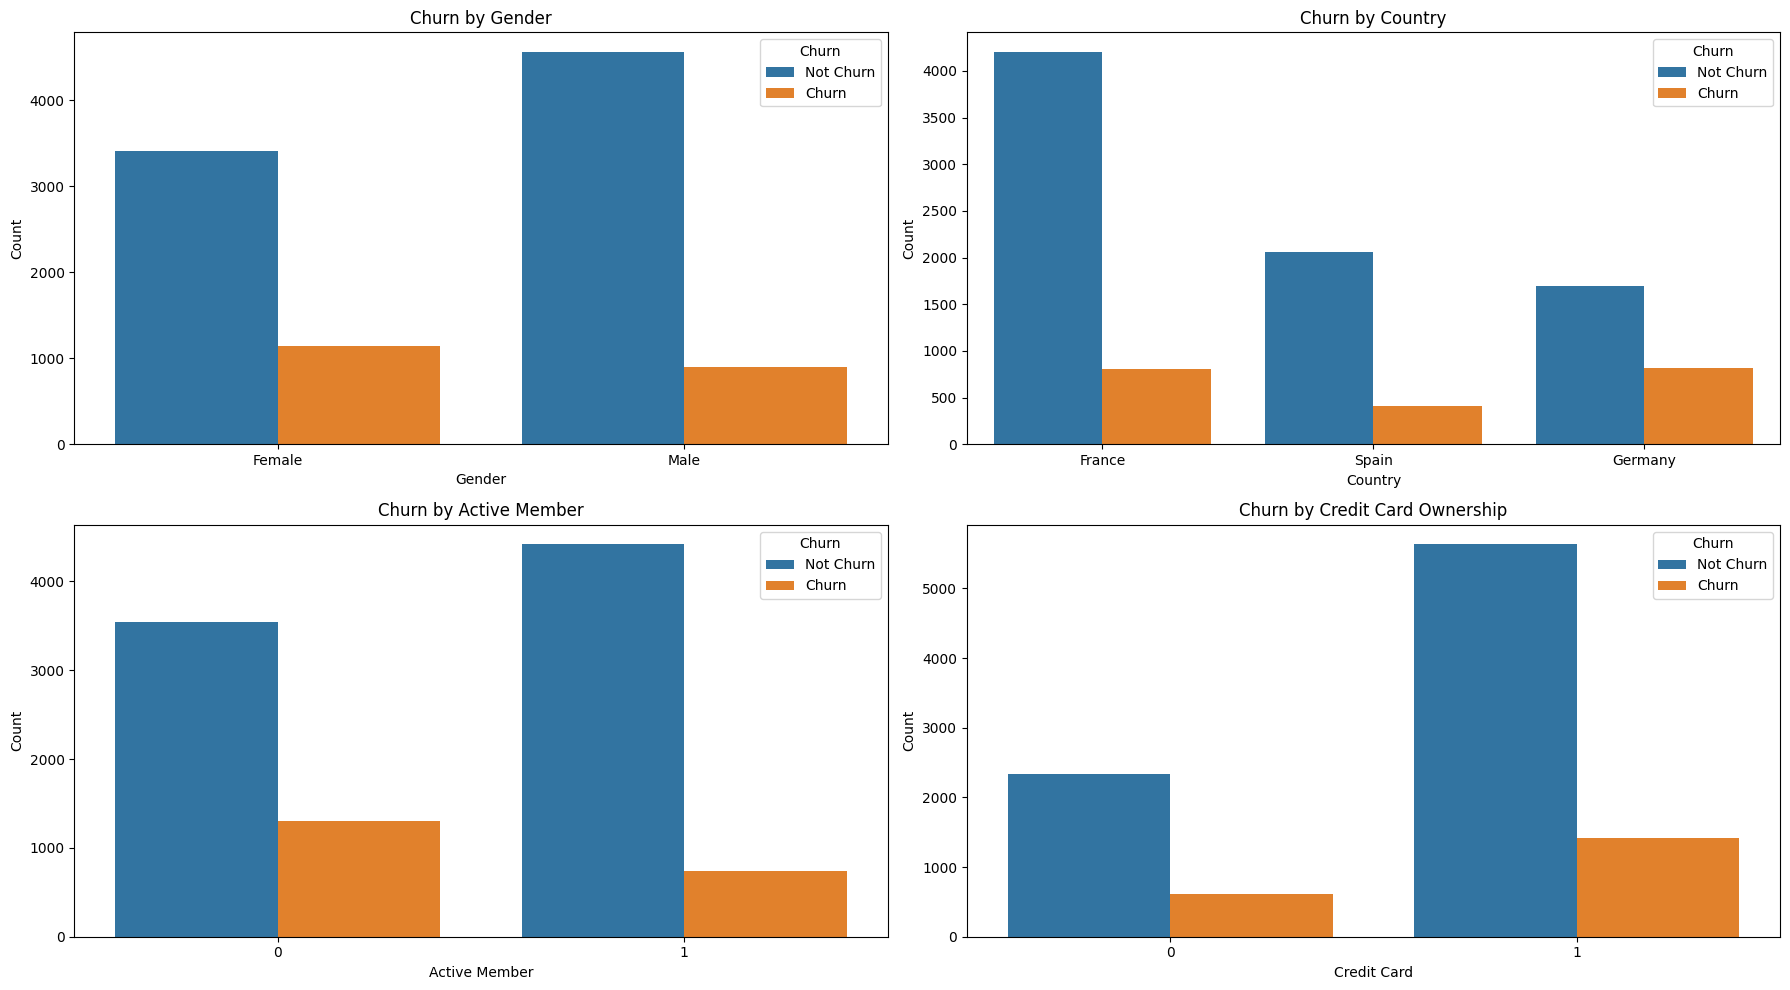

In [ ]:
# 4개의 카테고리형 데이터와 이탈 여부 간의 관계 시각화
plt.figure(figsize=(18, 10))

# 성별과 이탈 여부 간의 관계
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='gender', hue='churn')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churn', 'Churn'])

# 나라와 이탈 여부 간의 관계
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='country', hue='churn')
plt.title('Churn by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churn', 'Churn'])

# 활동 여부와 이탈 여부 간의 관계
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='active_member', hue='churn')
plt.title('Churn by Active Member')
plt.xlabel('Active Member')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churn', 'Churn'])

# 신용카드 보유 여부와 이탈 여부 간의 관계
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='credit_card', hue='churn')
plt.title('Churn by Credit Card Ownership')
plt.xlabel('Credit Card')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churn', 'Churn'])

plt.tight_layout()
plt.show()


 **이탈률 계산**

In [ ]:
df['churn'].sum() / 10000

0.2037

# **3. 데이터 전처리**

In [ ]:
# Germany를 제외한 데이터 생성
df_excluding_germany = df[(df['country'] != 'Germany')]
df_excluding_germany.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# ***머신러닝 수행***

In [ ]:
# 'products_number'가 4인 행을 제외한 데이터 생성
df_excluded = df_excluding_germany[df_excluding_germany['products_number'] != 4]

# products_number 4포함
# df_excluded = df_excluding_germany

df_excluded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7455 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       7455 non-null   int64  
 1   credit_score      7455 non-null   float64
 2   country           7455 non-null   object 
 3   gender            7455 non-null   object 
 4   age               7455 non-null   float64
 5   tenure            7455 non-null   float64
 6   balance           7455 non-null   float64
 7   products_number   7455 non-null   int64  
 8   credit_card       7455 non-null   int64  
 9   active_member     7455 non-null   int64  
 10  estimated_salary  7455 non-null   float64
 11  churn             7455 non-null   int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 757.1+ KB


**로그스케일링** 적용

In [ ]:
# 로그 스케일링을 적용할 수치형 변수 선택
numeric_columns = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

# 로그 스케일링 수행
for col in numeric_columns:
    # 로그 스케일링을 적용할 때 0값을 포함하지 않도록 조정
    df_excluded[col] = np.log1p(df_excluded[col])

# 로그 스케일링이 적용된 데이터 확인
df_excluded.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Spain,gender_Male
0,15634602,6.429719,3.761200,1.098612,0.000000,1,1,1,11.526334,1,0,0
1,15647311,6.411818,3.737670,0.693147,11.336294,1,0,1,11.631096,0,1,0
2,15619304,6.220590,3.761200,2.197225,11.980813,3,1,0,11.643362,1,0,0
3,15701354,6.551080,3.688879,0.693147,0.000000,2,0,0,11.449215,0,0,0
4,15737888,6.746412,3.784190,1.098612,11.740155,1,1,1,11.278280,0,1,0


In [ ]:
df_excluded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7491 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       7491 non-null   int64  
 1   credit_score      7491 non-null   float64
 2   age               7491 non-null   float64
 3   tenure            7491 non-null   float64
 4   balance           7491 non-null   float64
 5   products_number   7491 non-null   int64  
 6   credit_card       7491 non-null   int64  
 7   active_member     7491 non-null   int64  
 8   estimated_salary  7491 non-null   float64
 9   churn             7491 non-null   int64  
 10  country_Spain     7491 non-null   uint8  
 11  gender_Male       7491 non-null   uint8  
dtypes: float64(5), int64(5), uint8(2)
memory usage: 658.4 KB


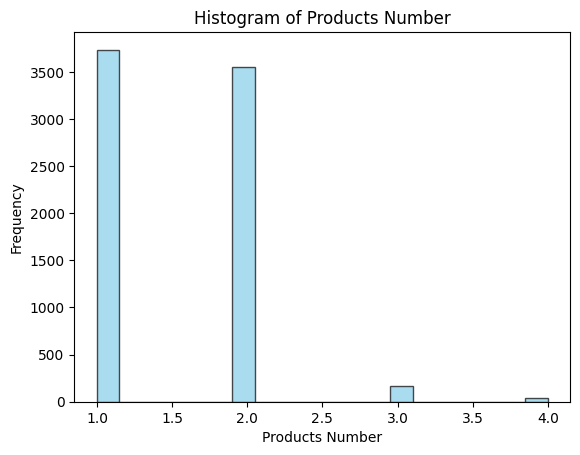

In [ ]:
import matplotlib.pyplot as plt

# 히스토그램 그리기
plt.hist(df_excluded['products_number'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# 그래프 제목 및 축 레이블 설정
plt.title('Histogram of Products Number')
plt.xlabel('Products Number')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()

**더미만들기**

In [ ]:
df_excluded = pd.get_dummies(df_excluded, columns=['country', 'gender'], drop_first=True)
df_excluded.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Spain,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,1,0


# **모델링**

In [ ]:
from sklearn.model_selection import train_test_split
y_column = ['churn']
X = df_excluded.drop(['customer_id', 'churn'], axis=1)
y = df_excluded[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
print('#'*20, 'X_train', '#'*20)
print(X_train.head, end='\n')
print('#'*20, 'Y_train', '#'*20)
print(y_train.head, end='\n\n')
print('#'*20, 'X_test', '#'*20)
print(X_test.head, end='\n')
print('#'*20, 'Y_test', '#'*20)
print(y_test.head, end='\n')

#################### X_train ####################
<bound method NDFrame.head of       credit_score       age    tenure   balance  products_number  \
4271      1.966299  1.509918  1.026672  0.000000                2   
2572      2.023939  1.624826  1.194706  2.519449                2   
1745      1.984152  1.489299  0.741276  2.538755                1   
586       2.005921  1.607232  1.194706  2.568516                1   
7775      2.007426  1.550446  1.223156  0.000000                2   
...            ...       ...       ...       ...              ...   
6902      1.963872  1.570003  1.124748  0.000000                2   
6948      2.030961  1.509918  0.869742  2.564498                1   
7167      2.017256  1.481877  1.124748  2.548684                1   
1159      2.027233  1.534194  1.223156  0.000000                2   
9696      1.989481  1.503301  1.162283  2.524749                1   

      credit_card  active_member  estimated_salary  country_Spain  gender_Male  
4271      

**로지스틱 회귀**

In [ ]:
from sklearn.linear_model import LogisticRegression

# 선형 회귀 모델 초기화 및 학습
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)


# 학습된 모델의 계수(coefficients) 및 절편(intercept) 출력
coefficients = logistic_reg.coef_
intercept = logistic_reg.intercept_

print('#'*20, '학습된 파라미터 값', '#'*20)
print(coefficients)

print('#'*20, '학습된 절편 값', '#'*20)
print(intercept)

#################### 학습된 파라미터 값 ####################
[[-0.86675441 10.26417315 -0.17705359  0.13385197 -0.06420536 -0.05260401
  -0.94132351  0.71686829  0.05962664 -0.55524712]]
#################### 학습된 절편 값 ####################
[-16.71130379]


**accuracy 평가**

In [ ]:
from sklearn.metrics import accuracy_score

# 예측 수행
y_train_pred = logistic_reg.predict(X_train)
y_test_pred = logistic_reg.predict(X_test)

# 평가 지표 계산: 정확도 (맞은수/전체)
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print('학습 데이터를 이용한 Acc 값 :', acc_train)
print('평가 데이터를 이용한 Acc 값 :', acc_test)


학습 데이터를 이용한 Acc 값 : 0.8409546061415221
평가 데이터를 이용한 Acc 값 : 0.847898599066044


In [ ]:
coeff_df = pd.DataFrame({'feature': X_train.columns, 'coefficient': logistic_reg.coef_.flatten()})

# 계수의 절대값을 기준으로 내림차순 정렬
coeff_df['abs_coefficient'] = coeff_df['coefficient'].abs()
coeff_df_sorted = coeff_df.sort_values(by='abs_coefficient', ascending=False)

# 변수의 영향력을 확인
coeff_df_sorted

,feature,coefficient,abs_coefficient
1,age,10.264173,10.264173
6,active_member,-0.941324,0.941324
0,credit_score,-0.866754,0.866754
7,estimated_salary,0.716868,0.716868
9,gender_Male,-0.555247,0.555247
2,tenure,-0.177054,0.177054
3,balance,0.133852,0.133852
4,products_number,-0.064205,0.064205
8,country_Spain,0.059627,0.059627
5,credit_card,-0.052604,0.052604


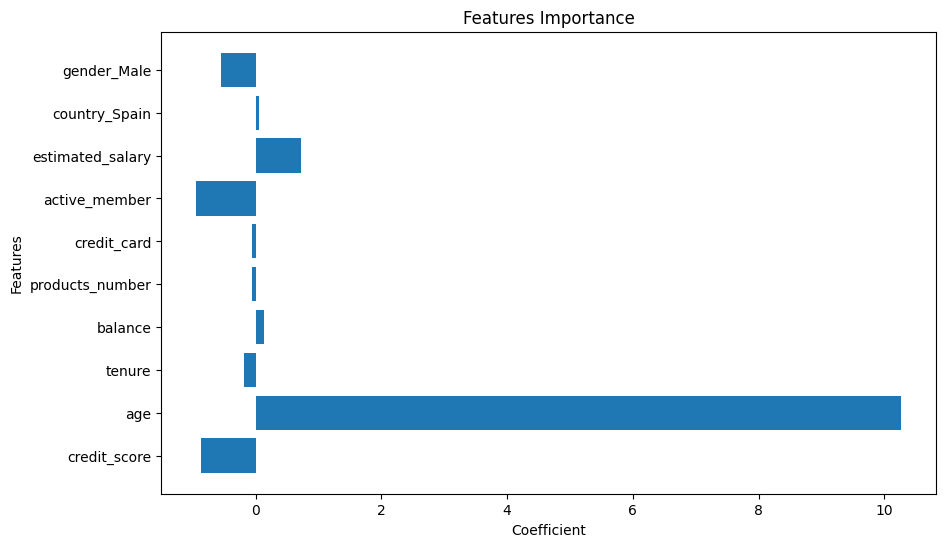

In [ ]:
# 변수 영향력 시각화
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, logistic_reg.coef_.flatten())
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('Features Importance')
plt.show()

**F-1 Score 평가**

In [ ]:
from sklearn.metrics import f1_score

# 학습 데이터와 평가 데이터의 예측값
y_train_pred = logistic_reg.predict(X_train)
y_test_pred = logistic_reg.predict(X_test)

# F1-score 계산
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

print('학습 데이터를 이용한 F1-score:', f1_train)
print('평가 데이터를 이용한 F1-score:', f1_test)


학습 데이터를 이용한 F1-score: 0.06842619745845552
평가 데이터를 이용한 F1-score: 0.08064516129032258


<Axes: >

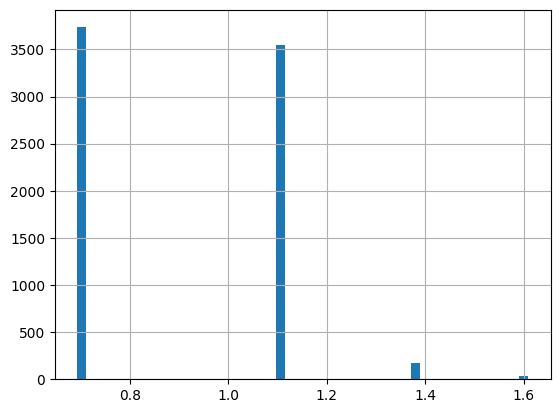

In [ ]:
np.log(df_excluded['products_number']+1).hist(bins=50)

**SMOTE 오버 샘플링**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# 독립 변수와 종속 변수 분리
X = df_excluded.drop(['customer_id', 'churn'], axis=1)
y = df_excluded['churn']

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE를 사용하여 오버샘플링
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# 학습 데이터와 테스트 데이터에서 F1-score 계산
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

print('학습 데이터를 이용한 F1-score:', f1_train)
print('평가 데이터를 이용한 F1-score:', f1_test)


학습 데이터를 이용한 F1-score: 0.42315112540192934
평가 데이터를 이용한 F1-score: 0.41335044929396664


In [ ]:
from sklearn.metrics import accuracy_score

# 학습 데이터에서 예측값 계산
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 정확도 계산
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('학습 데이터를 이용한 정확도:', accuracy_train)
print('평가 데이터를 이용한 정확도:', accuracy_test)


학습 데이터를 이용한 정확도: 0.6991951710261569
평가 데이터를 이용한 정확도: 0.6934942991281019


**StandardScaler 사용**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# 원-핫 인코딩 적용
X = pd.get_dummies(df.drop(['customer_id', 'churn'], axis=1))
y = df['churn']

# StandardScaler를 사용하여 데이터 전처리
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 훈련 데이터에서 F1-score 계산
y_train_pred = model.predict(X_train)
f1_train = f1_score(y_train, y_train_pred)

# 테스트 데이터에서 F1-score 계산
y_test_pred = model.predict(X_test)
f1_test = f1_score(y_test, y_test_pred)

print('훈련 데이터를 이용한 F1-score:', f1_train)
print('평가 데이터를 이용한 F1-score:', f1_test)


훈련 데이터를 이용한 F1-score: 0.3224068253255501
평가 데이터를 이용한 F1-score: 0.2947761194029851


**계층적 샘플링 적용**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# 독립 변수와 종속 변수 분리
X = df_excluded.drop(['customer_id', 'churn'], axis=1)
y = df_excluded['churn']

# 계층적 샘플링을 위한 객체 생성
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# 계층적 샘플링을 통해 데이터 분할
for train_index, test_index in stratified_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# 로지스틱 회귀 모델 학습
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = logistic_model.predict(X_test)

# F1-score 계산
f1score = f1_score(y_test, y_pred)
print("F1-score: ", f1score)


F1-score:  0.1911764705882353


**Desicion Tree 모델 사용**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X = df_excluded.drop(['customer_id', 'churn'], axis=1)
y = df_excluded['churn']

# 학습용과 평가용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree 모델 생성 및 학습
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 모델 평가
train_preds_dt = dt_model.predict(X_train)
test_preds_dt = dt_model.predict(X_test)

train_report_dt = classification_report(y_train, train_preds_dt)
test_report_dt = classification_report(y_test, test_preds_dt)

print("Training Classification Report:")
print(train_report_dt)
print("Test Classification Report:")
print(test_report_dt)

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5009
           1       1.00      1.00      1.00       955

    accuracy                           1.00      5964
   macro avg       1.00      1.00      1.00      5964
weighted avg       1.00      1.00      1.00      5964

Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1259
           1       0.38      0.44      0.41       232

    accuracy                           0.80      1491
   macro avg       0.64      0.65      0.64      1491
weighted avg       0.81      0.80      0.81      1491



**Desicion Tree 모델 사용 + 계층적 샘플링**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


# 독립 변수와 종속 변수 분리
X = df_excluded.drop(['customer_id', 'churn'], axis=1)
y = df_excluded['churn']

# 계층적 샘플링을 위한 객체 생성
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# 계층적 샘플링을 통해 데이터 분할
for train_index, test_index in stratified_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Decision Tree 모델 생성 및 학습
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 모델 평가
train_preds_dt = dt_model.predict(X_train)
test_preds_dt = dt_model.predict(X_test)

train_report_dt = classification_report(y_train, train_preds_dt)
test_report_dt = classification_report(y_test, test_preds_dt)

print("Training Classification Report:")
print(train_report_dt)
print("Test Classification Report:")
print(test_report_dt)


Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5014
           1       1.00      1.00      1.00       978

    accuracy                           1.00      5992
   macro avg       1.00      1.00      1.00      5992
weighted avg       1.00      1.00      1.00      5992

Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1254
           1       0.43      0.44      0.43       245

    accuracy                           0.81      1499
   macro avg       0.66      0.66      0.66      1499
weighted avg       0.81      0.81      0.81      1499



**랜덤 포레스트 모델 적용**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 데이터 준비
X = df_excluded.drop(['customer_id', 'churn'], axis=1)
y = df_excluded['churn']

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성 및 훈련
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = rf_model.predict(X_test)

# 분류 보고서 출력
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1261
           1       0.76      0.44      0.56       238

    accuracy                           0.89      1499
   macro avg       0.83      0.71      0.75      1499
weighted avg       0.88      0.89      0.88      1499



In [ ]:
# 계층적 샘플링을 위한 객체 생성
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# 계층적 샘플링을 통해 데이터 분할
for train_index, test_index in stratified_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# 랜덤 포레스트 모델 생성 및 훈련
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = rf_model.predict(X_test)

# 분류 보고서 출력
print(classification_report(y_test, y_pred))

NameError: name 'StratifiedShuffleSplit' is not defined

**그리드 서치 수행**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 모델 생성
rf_model = RandomForestClassifier(random_state=42)

# 탐색할 하이퍼파라미터 범위
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'class_weight': [None, 'balanced']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 및 성능 출력
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'class_weight': None, 'max_depth': None, 'min_samples_split': 10}
Best Recall: 0.8821796405184621


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 최적의 하이퍼파라미터를 적용하여 랜덤 포레스트 모델 생성
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=5, min_samples_split=10)
# rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=5, min_samples_split=10, max_features='sqrt')
rf_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = rf_model.predict(X_test)

# 분류 보고서 출력
print("Test Classification Report:")
print(classification_report(y_test, y_pred))

Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1261
           1       0.46      0.74      0.57       238

    accuracy                           0.82      1499
   macro avg       0.70      0.79      0.73      1499
weighted avg       0.87      0.82      0.84      1499

